In [1]:
import pandas as pd

# KDD Cup 1999 Data Competition

In [87]:
kddcup = pd.read_csv("ADM-kddcup_data-small.csv", skipinitialspace=True)

In [88]:
kddcup

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,54540,8314,0,0,0,2,...,190,1.0,0.00,0.01,0.0,0.00,0.00,0.01,0.01,back.
1,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.0,0.00,0.00,0.0,0.00,0.00,0.04,0.04,back.
2,0,tcp,http,SF,54540,8314,0,0,0,2,...,99,1.0,0.00,0.01,0.0,0.01,0.01,0.01,0.01,back.
3,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.0,0.00,0.00,0.0,0.00,0.00,0.04,0.04,back.
4,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.0,0.00,0.00,0.0,0.01,0.01,0.03,0.03,back.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23747,9,tcp,ftp_data,SF,0,5149533,0,0,0,0,...,14,1.0,0.00,1.00,0.0,0.00,0.00,0.00,0.00,warezmaster.
23748,156,tcp,ftp,SF,950,2551,0,0,0,18,...,1,0.0,0.03,0.00,0.0,0.01,0.00,0.07,0.00,warezmaster.
23749,9,tcp,ftp_data,SF,0,5153771,0,0,0,0,...,12,1.0,0.00,1.00,0.0,0.00,0.00,0.00,0.00,warezmaster.
23750,0,tcp,ftp,SF,36,197,0,0,0,0,...,1,0.0,0.05,0.00,0.0,0.39,0.00,0.05,0.00,warezmaster.


## Problem definition

We want to separate the dataset with the label normal and the other labels

Here, there are the possibles values of label :

In [89]:
kddcup["label"].unique()

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype=object)

* back.
* buffer_overflow.
* ftp_write.
* guess_passwd.
* imap.
* ipsweep.
* land.
* loadmodule.
* multihop.
* neptune.
* nmap.
* **normal.**
* perl.
* phf.
* pod.
* portsweep.
* rootkit.
* satan.
* smurf.
* spy.
* teardrop.
* warezclient.
* warezmaster.

## Visualisation

In [90]:
import seaborn as sns

I want to know how many features and row there are: 

In [91]:
kddcup.shape

(23752, 42)

That means we have 42 features ( or dimensions ) with 23 752 points

I can see there are a lot of differents type of attacks

<AxesSubplot: >

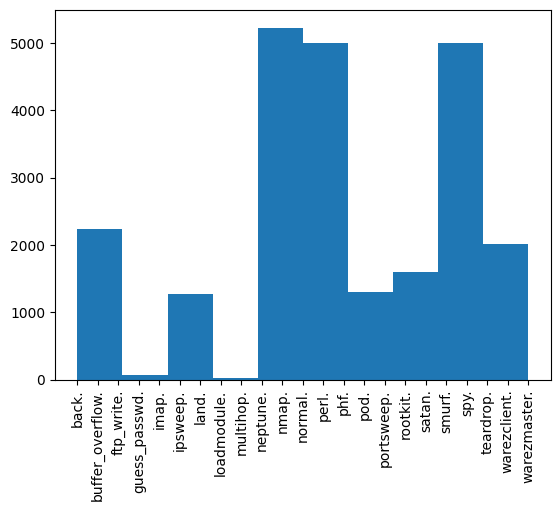

In [92]:
kddcup["label"].hist(grid=False, xrot=90)

I want to check if there is null values in the dataset. For that I use the seaborn library which is made for Data Visualization. I use a heatmap graph which is in white if the value of a column is null. 

<AxesSubplot: >

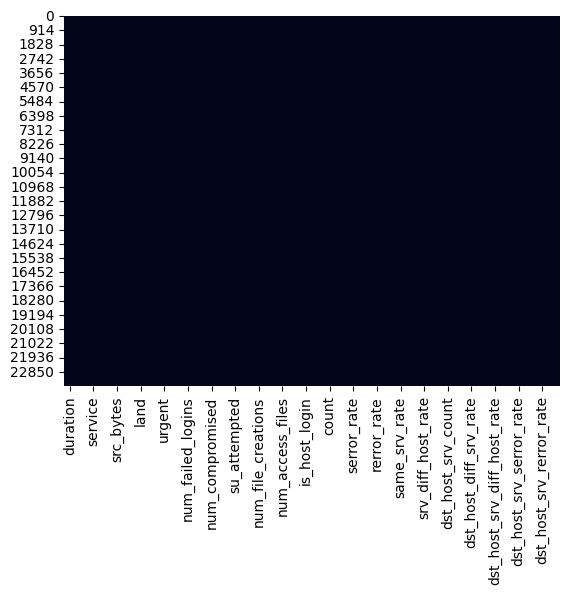

In [93]:
# The white represents the missing values
sns.heatmap(kddcup.isnull(), cbar=False)

I am happy to see there is no missing values. I can check in another way with the sum() function on isnull() 

In [94]:
kddcup.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [95]:
kddcup.protocol_type.unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

<AxesSubplot: xlabel='protocol_type', ylabel='count'>

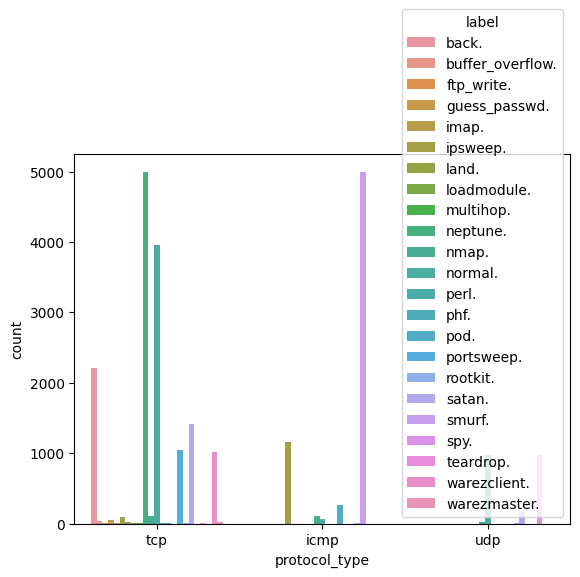

In [96]:
sns.countplot(data=kddcup, x="protocol_type", hue="label")

We can see links between protocol type and the type of attack

## Data Preprocessing

In the Data Visualization part, it's possible to see there is no missing values. However, the dataset is a mix of categorical data and numerical data. In order to solve the problem, I need to encode the categorical values. 

First, I need to get the type of the features. 

In [97]:
kddcup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23752 entries, 0 to 23751
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     23752 non-null  int64  
 1   protocol_type                23752 non-null  object 
 2   service                      23752 non-null  object 
 3   flag                         23752 non-null  object 
 4   src_bytes                    23752 non-null  int64  
 5   dst_bytes                    23752 non-null  int64  
 6   land                         23752 non-null  int64  
 7   wrong_fragment               23752 non-null  int64  
 8   urgent                       23752 non-null  int64  
 9   hot                          23752 non-null  int64  
 10  num_failed_logins            23752 non-null  int64  
 11  logged_in                    23752 non-null  int64  
 12  num_compromised              23752 non-null  int64  
 13  root_shell      

As we can see below, there is a mix of float64, int64 and object types. The object type is the categorical data. protocol_type, service, flag and label are the categorical data. 

Because first, I want to separate normal traffic for attack, I don't need the have all the type of the label. So, I can copy the dataset and modify the not normal label to "attack" 

In [98]:
preprocessedkdd = kddcup.copy()

In [99]:
preprocessedkdd.loc[preprocessedkdd['label'] != "normal.", 'label'] = 'attack.'

In [100]:
preprocessedkdd.label.unique()

array(['attack.', 'normal.'], dtype=object)

In [101]:
kddcup.label.unique()

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype=object)

The values of categorical data are nominal according to https://www.kdnuggets.com/2021/05/deal-with-categorical-data-machine-learning.html , it's better to use One-Hot encoding.  

In [102]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

In [103]:
#your code
preprocessedkdd_objects = preprocessedkdd.select_dtypes(include="object")
onehot_encoder.fit_transform(preprocessedkdd_objects)
preprocessedkdd_objects.loc[[0]]

/home/adam/DataMiningProject/DataMiningProject/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,protocol_type,service,flag,label
0,tcp,http,SF,attack.


In [105]:
onehot_encoder.transform(preprocessedkdd_objects.loc[[0]])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.]])

## Model Training

Because There is a binary classification, it's better to use SVM algorithm. 

## Parameter Tuning 

## Result Analysis